### Importando a biblioteca e visualizando a tabela

In [3]:
import pandas as pd
df = pd.read_csv('dados_rh.csv')
df.head(5)

,Name,Age,Gender,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Department,Position,Joining Date,Salary
0,Douglas Lindsey,25,Male,11,57,25,4.7,Marketing,Analyst,Jan-20,63596
1,Anthony Roberson,59,Female,19,55,76,2.8,IT,Manager,Jan-99,112540
2,Thomas Miller,30,Male,8,87,10,2.4,IT,Analyst,Jan-17,66292
3,Joshua Lewis,26,Female,1,53,4,1.4,Marketing,Intern,Jan-22,38303
4,Stephanie Bailey,43,Male,14,3,9,4.5,IT,Team Lead,Jan-05,101133


#### Alterando os nomes das colunas

In [4]:
df = df.rename(columns = {
    "Name": "Nome", "Age": "Idade", "Gender": "Gênero", "Projects Completed": "Projetos Finalizados",
    "Productivity (%)": "Produtividade (%)", "Satisfaction Rate (%)": "Satisfação (%)",
    "Feedback Score": "Feedback", "Department": "Departamento", "Position": "Cargo",
     "Joining Date": "Data de Entrada", "Salary": "Salário"
})

df

,Nome,Idade,Gênero,Projetos Finalizados,Produtividade (%),Satisfação (%),Feedback,Departamento,Cargo,Data de Entrada,Salário
0,Douglas Lindsey,25,Male,11,57,25,4.7,Marketing,Analyst,Jan-20,63596
1,Anthony Roberson,59,Female,19,55,76,2.8,IT,Manager,Jan-99,112540
2,Thomas Miller,30,Male,8,87,10,2.4,IT,Analyst,Jan-17,66292
3,Joshua Lewis,26,Female,1,53,4,1.4,Marketing,Intern,Jan-22,38303
4,Stephanie Bailey,43,Male,14,3,9,4.5,IT,Team Lead,Jan-05,101133
...,...,...,...,...,...,...,...,...,...,...,...
195,Stephanie Fisher,29,Female,9,32,87,3.5,HR,Junior Developer,Jan-19,50051
196,Jeremy Miller,26,Male,7,45,28,2.8,IT,Junior Developer,Jan-21,46612
197,Daniel Pierce,22,Male,3,36,77,1.6,Finance,Intern,Jan-21,32992
198,Michael Hernandez,36,Female,23,96,50,3.4,Marketing,Manager,Jan-05,104216


#### Alterando os valores das colunas

In [5]:
df['Gênero'] = df['Gênero'].map({'Male': 'Masculino', 'Female': 'Feminino'})
df['Departamento'] = df['Departamento'].map({'Marketing': 'Marketing', 'IT': 'TI', 'Sales': 'Vendas', 'HR': 'RH', 'Finance': 'Financeiro'})
df['Cargo'] = df['Cargo'].map({'Analyst': 'Analista', 'Manager': 'Gerente', 'Intern': 'Estagiário', 'Team Lead': 'Líder de Equipe', 'Junior Developer': 'Dev Junior', 'Senior Developer': 'Dev Senior'})

df

,Nome,Idade,Gênero,Projetos Finalizados,Produtividade (%),Satisfação (%),Feedback,Departamento,Cargo,Data de Entrada,Salário
0,Douglas Lindsey,25,Masculino,11,57,25,4.7,Marketing,Analista,Jan-20,63596
1,Anthony Roberson,59,Feminino,19,55,76,2.8,TI,Gerente,Jan-99,112540
2,Thomas Miller,30,Masculino,8,87,10,2.4,TI,Analista,Jan-17,66292
3,Joshua Lewis,26,Feminino,1,53,4,1.4,Marketing,Estagiário,Jan-22,38303
4,Stephanie Bailey,43,Masculino,14,3,9,4.5,TI,Líder de Equipe,Jan-05,101133
...,...,...,...,...,...,...,...,...,...,...,...
195,Stephanie Fisher,29,Feminino,9,32,87,3.5,RH,Dev Junior,Jan-19,50051
196,Jeremy Miller,26,Masculino,7,45,28,2.8,TI,Dev Junior,Jan-21,46612
197,Daniel Pierce,22,Masculino,3,36,77,1.6,Financeiro,Estagiário,Jan-21,32992
198,Michael Hernandez,36,Feminino,23,96,50,3.4,Marketing,Gerente,Jan-05,104216


### Análise dos Dados

In [6]:
import matplotlib.pyplot as plt

(array([0, 1]), [Text(0, 0, 'Feminino'), Text(1, 0, 'Masculino')])

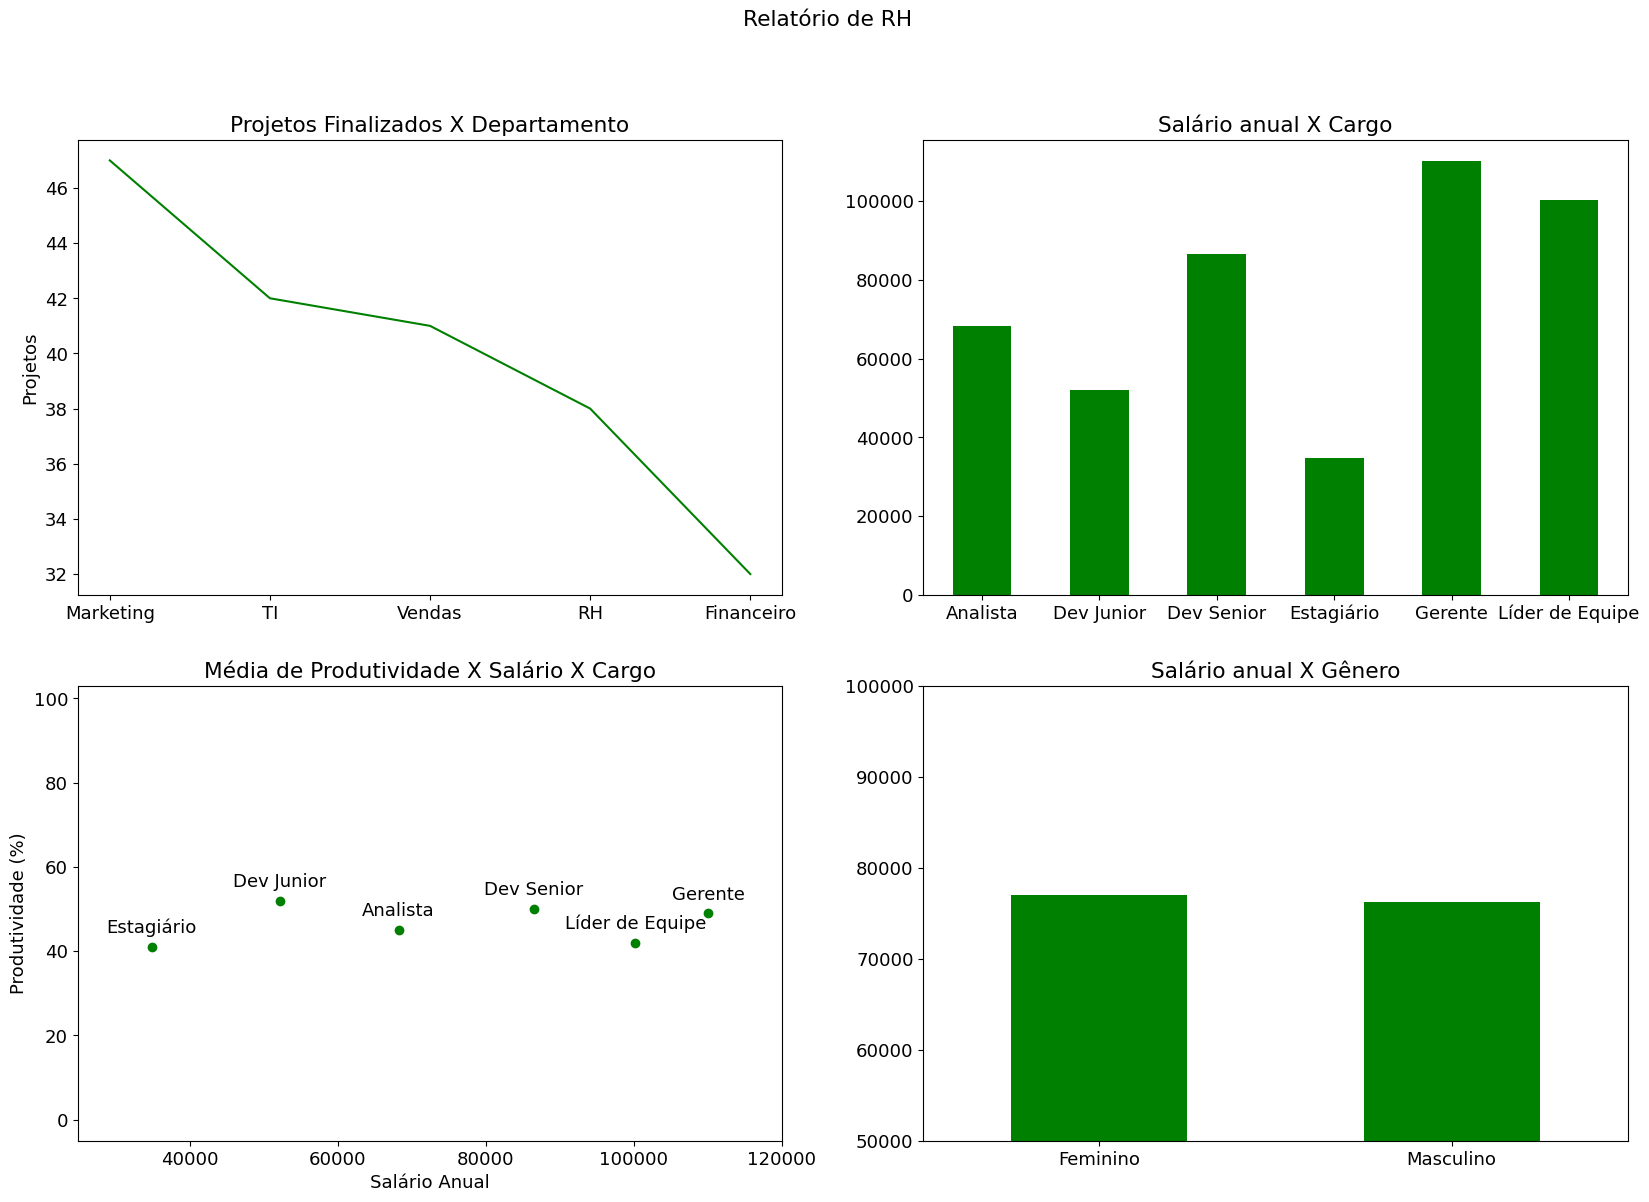

In [7]:
plt.figure(figsize=(20,13))
plt.rcParams.update({'font.size': 13})
plt.suptitle("Relatório de RH")

# Gráfico 1
plt.subplot(221)

deps = list(df['Departamento'].unique())
projetos = list(df['Departamento'].value_counts())
plt.plot(deps, projetos, 'g')
plt.ylabel('Projetos')
plt.title('Projetos Finalizados X Departamento')


# Gráfico 2
plt.subplot(222)

cargo = list(df['Cargo'].unique())
salario = df.groupby('Cargo')['Salário'].mean()
salario.plot(kind = 'bar',xlabel="", color='g')
plt.xticks(rotation = 360)
plt.title('Salário anual X Cargo')


# Gráfico 3
plt.subplot(223)

media_produtividade_salario = df.groupby('Cargo').agg({'Produtividade (%)': 'mean', 'Salário': 'mean'}).round()
plt.scatter(media_produtividade_salario['Salário'], media_produtividade_salario['Produtividade (%)'], color='g')
plt.ylim(min(df['Produtividade (%)'])-5, max(df['Produtividade (%)'])+5)
plt.xlim(min(salario)-10000, max(salario)+10000)
plt.title("Média de Produtividade X Salário X Cargo")
plt.ylabel('Produtividade (%)')
plt.xlabel('Salário Anual')
# Adicionar rótulos para cada ponto
for i, k in media_produtividade_salario.iterrows():
    plt.annotate(i, (k['Salário'], k['Produtividade (%)']), textcoords="offset points", xytext=(0,10), ha='center')


# Gráfico 4
plt.subplot(224)

gen = df.groupby('Gênero')['Salário'].mean()
gen.plot(kind = 'bar',xlabel="", color='g')
plt.ylim(50000, 100000)
plt.title('Salário anual X Gênero')
plt.xticks(rotation = 360)

In [10]:
df.to_excel('relatório_final.xlsx', index = False)